# Machine learning First Project
## Made By: Momen Bazzar - 1192214
### description of the project and dataset: https://www.dropbox.com/s/v56my2jh9fntbnx/COMP4388-Fall2023-Project1.pdf?dl=0

### you need to install the follwing packages using command line: pandas, matplotlib
<hr/>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# read the dataset file
df = pd.read_csv('Customer Churn.csv')
df

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,0,no,16,0,1200,19,12,9,2,pre-paid,active,25,108.855,yes
3146,3147,9,no,15,0,5897,134,69,37,1,post-paid,active,15,711.205,yes
3147,3148,5,no,13,0,8437,164,57,35,4,pre-paid,active,45,357.525,yes
3148,3149,1,no,14,2,2357,38,15,14,3,pre-paid,active,30,155.800,yes


<hr/>
1. print the summary statistics of all attributes in the dataset.

In [6]:
df.describe()

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


<hr/>
2. Show the distribution of the class label (churn) and indicate any highlights in the distribution of the class label.

<AxesSubplot: ylabel='Churn'>

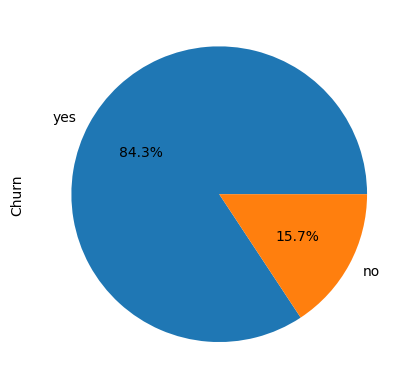

In [21]:
df['Churn'].value_counts().plot(kind="pie", autopct="%1.1f%%")

<AxesSubplot: >

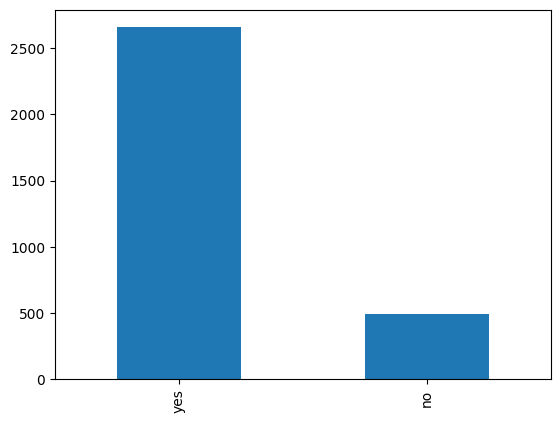

In [22]:
df['Churn'].value_counts().plot(kind="bar")

We realize that our churn rate is 84.3%, which determines that a lot of customers are not satisfied with the company services and stop dealing with the company. That is a huge indicator of a bad policy, and something has to change.

<hr/>
3. For each age group, draw a histogram detailing the amount of churn in each subgroup.

Text(0, 0.5, 'Percentage')

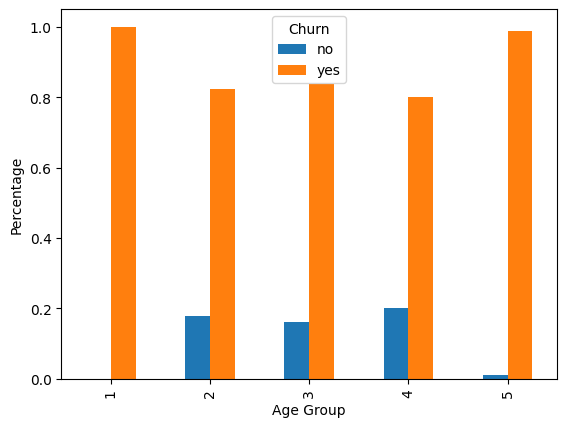

In [74]:
# Group the data by age group and plot a bar chart for each group
(df.groupby('Age Group')['Churn']
   .value_counts()
   .unstack(1)
   .apply(lambda x: x / x.sum(), axis=1)
   .plot(kind="bar"))

plt.xlabel("Age Group")
plt.ylabel("Percentage")

<hr/>
4. For each Charge amount, draw a histogram detailing the amount of churn in each subgroup.

Text(0, 0.5, 'Percentage')

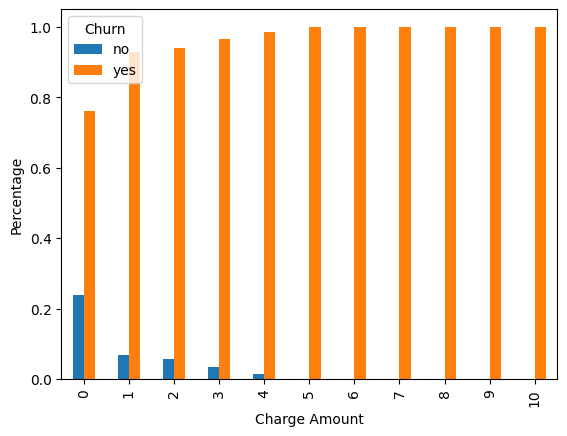

In [75]:
# Group the data by chage amount and plot a bar chart for each group
(df.groupby('Charge Amount')['Churn']
   .value_counts()
   .unstack(1)
   .apply(lambda x: x / x.sum(), axis=1)
   .plot(kind="bar"))

plt.xlabel("Charge Amount")
plt.ylabel("Percentage")